# Assignment 3

In this assigment, we will work with the *Forest Fire* data set. Please download the data from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/162/forest+fires). Extract the data files into the subdirectory: `../data/fires/` (relative to `./src/`).

## Objective

+ The model objective is to predict the area affected by forest fires given the features set. 
+ The objective of this exercise is to assess your ability to construct and evaluate model pipelines.
+ Please note: the instructions are not meant to be 100% prescriptive, but instead they are a set of minimum requirements. If you find predictive performance gains by applying additional steps, by all means show them. 

## Variable Description

From the description file contained in the archive (`forestfires.names`), we obtain the following variable descriptions:

1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
3. month - month of the year: "jan" to "dec" 
4. day - day of the week: "mon" to "sun"
5. FFMC - FFMC index from the FWI system: 18.7 to 96.20
6. DMC - DMC index from the FWI system: 1.1 to 291.3 
7. DC - DC index from the FWI system: 7.9 to 860.6 
8. ISI - ISI index from the FWI system: 0.0 to 56.10
9. temp - temperature in Celsius degrees: 2.2 to 33.30
10. RH - relative humidity in %: 15.0 to 100
11. wind - wind speed in km/h: 0.40 to 9.40 
12. rain - outside rain in mm/m2 : 0.0 to 6.4 
13. area - the burned area of the forest (in ha): 0.00 to 1090.84 









### Specific Tasks

+ Construct four model pipelines, out of combinations of the following components:

    + Preprocessors:

        - A simple processor that only scales numeric variables and recodes categorical variables.
        - A transformation preprocessor that scales numeric variables and applies a non-linear transformation.
    
    + Regressor:

        - A baseline regressor, which could be a [K-nearest neighbours model](https://open.spotify.com/track/4R3AU2pjv8ge2siX1fVbZs?si=b2712f32da0e4358) or a simple [linear regression model](https://scikit-learn.org/stable/modules/linear_model.html)
        - An advanced regressor of your choice (e.g., Random Forest, Neural Network, etc.)

+ Evaluate tune and evaluate each of the four model pipelines. 

    - Select a [performance metric](https://scikit-learn.org/stable/modules/linear_model.html) out of the following options: explained variance, max error, root mean squared error (RMSE), mean absolute error (MAE), r-squared.
    - *TIPS*: 
    
        * Out of the suggested metrics above, [some are correlation metrics, but this is a prediction problem](https://www.tmwr.org/performance#performance). Choose wisely (and don't choose the incorrect options.) 

+ Select the best-performing model and explain its predictions.

    - Provide local explanations.
    - Obtain global explanations and recommend a variable selection strategy.

+ Export your model as a pickle file.


You can work on the Jupyter notebook, as this experiment is fairly short (no need to use sacred). 

# Load the data

Assuming that the files `adult.data` and `adult.test` are in `../data/adult/`, then you can use the code below to load them.

In [1]:
import pandas as pd
columns = [
    'coord_x', 'coord_y', 'month', 'day', 'ffmc', 'dmc', 'dc', 'isi', 'temp', 'rh', 'wind', 'rain', 'area' 
]
fires_dt = (pd.read_csv('../../05_src/data/fires/forestfires.csv', header = None, names = columns))

fires_dt

,coord_x,coord_y,month,day,ffmc,dmc,dc,isi,temp,rh,wind,rain,area
0,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
1,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0,0
2,7,4,oct,tue,90.6,35.4,669.1,6.7,18,33,0.9,0,0
3,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0,0
4,8,6,mar,fri,91.7,33.3,77.5,9,8.3,97,4,0.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
513,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0,6.44
514,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0,54.29
515,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0,11.16
516,1,4,aug,sat,94.4,146,614.7,11.3,25.6,42,4,0,0


# Get X and Y

Create the features data frame and target data.

In [2]:
# Drop the row with index 0 from the fires_dt DataFrame
fires_dt = fires_dt.drop(0)

# Importing the train_test_split function from scikit-learn
from sklearn.model_selection import train_test_split

# Defining the feature matrix X by dropping the 'area' column from the DataFrame
X = fires_dt.drop(columns=['area'], axis=1)

# Defining the target vector y as the 'area' column from the DataFrame
y = fires_dt['area']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Preprocessing

Create two [Column Transformers](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html), called preproc1 and preproc2, with the following guidelines:

- Numerical variables

    * (Preproc 1 and 2) Scaling: use a scaling method of your choice (Standard, Robust, Min-Max). 
    * Preproc 2 only: 
        
        + Choose a transformation for any of your input variables (or several of them). Evaluate if this transformation is convenient.
        + The choice of scaler is up to you.

- Categorical variables: 
    
    * (Preproc 1 and 2) Apply [one-hot encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) where appropriate.


+ The only difference between preproc1 and preproc2 is the non-linear transformation of the numerical variables.
    


### Preproc 1

Create preproc1 below.

+ Numeric: scaled variables, no other transforms.
+ Categorical: one-hot encoding.

In [3]:
# preproc1
# Importing necessary libraries from scikit-learn
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler, PowerTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestClassifier

# Defining the numerical columns
num_cols = ['coord_x', 'coord_y', 'ffmc', 'dmc', 'dc', 'isi', 'temp', 'rh', 'wind', 'rain']
# Defining the categorical columns
cat_cols = ['month', 'day']

# Creating a pipeline for preprocessing numerical columns
pipe_num_cols = Pipeline([
    ('standardizer', RobustScaler())
])
# Creating a pipeline for preprocessing categorical columns
pipe_cat_cols = Pipeline([
   ('standardizer', OneHotEncoder(handle_unknown='infrequent_if_exist') )
])
# Combining both numerical and categorical pipelines into a ColumnTransformer
preproc1 = ColumnTransformer([
    ('num', pipe_num_cols, num_cols),
    ('cat', pipe_cat_cols, cat_cols)]
    , remainder='drop')
# Display the preprocessing pipeline
preproc1

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('standardizer',
                                                  RobustScaler())]),
                                 ['coord_x', 'coord_y', 'ffmc', 'dmc', 'dc',
                                  'isi', 'temp', 'rh', 'wind', 'rain']),
                                ('cat',
                                 Pipeline(steps=[('standardizer',
                                                  OneHotEncoder(handle_unknown='infrequent_if_exist'))]),
                                 ['month', 'day'])])

### Preproc 2

Create preproc1 below.

+ Numeric: scaled variables, non-linear transformation to one or more variables.
+ Categorical: one-hot encoding.

In [4]:
# preproc2
# Importing necessary libraries from scikit-learn
from sklearn.preprocessing import QuantileTransformer, PowerTransformer

# Defining the numerical columns
num_cols = ['coord_x', 'coord_y', 'ffmc', 'dmc', 'dc', 'isi', 'temp', 'rh', 'wind', 'rain']
# Defining the categorical columns
cat_cols = ['month', 'day']
# Creating a ColumnTransformer for non-linear transformations
non_linear_transforms = ColumnTransformer(transformers=[('quantile_transform', QuantileTransformer(n_quantiles=10), ['rain']), 
                                                        ('power_transform', PowerTransformer(), ['ffmc'])], 
                                                        remainder='passthrough')
# Creating a pipeline for numerical columns
numerical_pipeline = Pipeline(steps=[('non_linear_transforms', non_linear_transforms), 
                                     ('standard_scaler', StandardScaler())])
# Creating a pipeline for categorical columns
categorical_pipeline = Pipeline(steps=[('one_hot_encoder', OneHotEncoder(handle_unknown='infrequent_if_exist'))])

# Combining the numerical and categorical pipelines into a ColumnTransformer
preproc2 = ColumnTransformer(
    transformers=[
        ('num_transforms', numerical_pipeline, num_cols), 
        ('cat_transforms', categorical_pipeline, cat_cols)])
# Display the preprocessing pipeline
preproc2

ColumnTransformer(transformers=[('num_transforms',
                                 Pipeline(steps=[('non_linear_transforms',
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('quantile_transform',
                                                                                   QuantileTransformer(n_quantiles=10),
                                                                                   ['rain']),
                                                                                  ('power_transform',
                                                                                   PowerTransformer(),
                                                                                   ['ffmc'])])),
                                                 ('standard_scaler',
                                                  StandardScaler())]),
                                 ['coord_x', 'coord_y', 'ffmc', 'dmc', 'dc',
                                  'isi', 'temp', 'rh', 'wind', 'rain']),
                                ('cat_transforms',
                                 Pipeline(steps=[('one_hot_encoder',
                                                  OneHotEncoder(handle_unknown='infrequent_if_exist'))]),
                                 ['month', 'day'])])

## Model Pipeline


Create a [model pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html): 

+ Add a step labelled `preprocessing` and assign the Column Transformer from the previous section.
+ Add a step labelled `regressor` and assign a regression model to it. 

## Regressor

+ Use a regression model to perform a prediction. 

    - Choose a baseline regressor, tune it (if necessary) using grid search, and evaluate it using cross-validation.
    - Choose a more advance regressor, tune it (if necessary) using grid search, and evaluate it using cross-validation.
    - Both model choices are up to you, feel free to experiment.

In [5]:
# Pipeline A = preproc1 + baseline
# Importing necessary libraries from scikit-learn
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
# Assuming preproc1 is the preprocessing pipeline created earlier

# Creating a full pipeline with preprocessing and a regressor
pipeline_A = Pipeline(steps=[
    ('preprocessing', preproc1),
    ('regressor', LinearRegression())])
# Display the pipeline
pipeline_A

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('standardizer',
                                                                   RobustScaler())]),
                                                  ['coord_x', 'coord_y', 'ffmc',
                                                   'dmc', 'dc', 'isi', 'temp',
                                                   'rh', 'wind', 'rain']),
                                                 ('cat',
                                                  Pipeline(steps=[('standardizer',
                                                                   OneHotEncoder(handle_unknown='infrequent_if_exist'))]),
                                                  ['month', 'day'])])),
                ('regressor', LinearRegression())])

In [6]:
# Pipeline B = preproc2 + baseline
# Creating a full pipeline with preprocessing and a regressor
pipeline_B = Pipeline(steps=[
    ('preprocessing', preproc2),
    ('regressor', LinearRegression())])
# Display the pipeline
pipeline_B

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num_transforms',
                                                  Pipeline(steps=[('non_linear_transforms',
                                                                   ColumnTransformer(remainder='passthrough',
                                                                                     transformers=[('quantile_transform',
                                                                                                    QuantileTransformer(n_quantiles=10),
                                                                                                    ['rain']),
                                                                                                   ('power_transform',
                                                                                                    PowerTransformer(),
                                                                                                    ['ffmc'])])),
                                                                  ('standard_scaler',
                                                                   StandardScaler())]),
                                                  ['coord_x', 'coord_y', 'ffmc',
                                                   'dmc', 'dc', 'isi', 'temp',
                                                   'rh', 'wind', 'rain']),
                                                 ('cat_transforms',
                                                  Pipeline(steps=[('one_hot_encoder',
                                                                   OneHotEncoder(handle_unknown='infrequent_if_exist'))]),
                                                  ['month', 'day'])])),
                ('regressor', LinearRegression())])

In [7]:
# Pipeline C = preproc1 + advanced model
# Importing necessary libraries from scikit-learn
from sklearn.ensemble import RandomForestRegressor
# Assuming preproc1 is the preprocessing pipeline created earlier

# Creating a full pipeline with preprocessing and an advanced regressor
pipeline_C = Pipeline(steps=[
    ('preprocessing', preproc1),
    ('regressor', RandomForestRegressor())])
# Display the pipeline
pipeline_C

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('standardizer',
                                                                   RobustScaler())]),
                                                  ['coord_x', 'coord_y', 'ffmc',
                                                   'dmc', 'dc', 'isi', 'temp',
                                                   'rh', 'wind', 'rain']),
                                                 ('cat',
                                                  Pipeline(steps=[('standardizer',
                                                                   OneHotEncoder(handle_unknown='infrequent_if_exist'))]),
                                                  ['month', 'day'])])),
                ('regressor', RandomForestRegressor())])

In [8]:
# Pipeline D = preproc2 + advanced model
# Assuming preproc2 is the preprocessing pipeline created earlier

# Creating a full pipeline with preprocessing and an advanced regressor
pipeline_D = Pipeline(steps=[
    ('preprocessing', preproc2),
    ('regressor', RandomForestRegressor())])
# Display the pipeline
pipeline_D

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num_transforms',
                                                  Pipeline(steps=[('non_linear_transforms',
                                                                   ColumnTransformer(remainder='passthrough',
                                                                                     transformers=[('quantile_transform',
                                                                                                    QuantileTransformer(n_quantiles=10),
                                                                                                    ['rain']),
                                                                                                   ('power_transform',
                                                                                                    PowerTransformer(),
                                                                                                    ['ffmc'])])),
                                                                  ('standard_scaler',
                                                                   StandardScaler())]),
                                                  ['coord_x', 'coord_y', 'ffmc',
                                                   'dmc', 'dc', 'isi', 'temp',
                                                   'rh', 'wind', 'rain']),
                                                 ('cat_transforms',
                                                  Pipeline(steps=[('one_hot_encoder',
                                                                   OneHotEncoder(handle_unknown='infrequent_if_exist'))]),
                                                  ['month', 'day'])])),
                ('regressor', RandomForestRegressor())])

# Tune Hyperparams

+ Perform GridSearch on each of the four pipelines. 
+ Tune at least one hyperparameter per pipeline.
+ Experiment with at least four value combinations per pipeline.

In [14]:
# Import necessary libraries
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for GridSearchCV
param_grid_A = {
    'regressor__fit_intercept': [True, False],
    'regressor__copy_X': [True, False]
}

# Define the scoring metric
scoring = ['neg_root_mean_squared_error'] 

# Set up GridSearchCV with the defined parameter grid and scoring metric
grid_search_A = GridSearchCV(
    estimator  = pipeline_A, 
    param_grid = param_grid_A, 
    scoring    = scoring, 
    cv         = 5,
    refit = "neg_root_mean_squared_error",
    return_train_score=True) 

# Fit GridSearchCV to the training data
grid_search_A.fit(X_train , y_train)

# Convert the cross-validation results to a DataFrame and sort by the rank of the test score
results_df = pd.DataFrame(grid_search_A.cv_results_).sort_values('rank_test_neg_root_mean_squared_error')

# Display the sorted results DataFrame
print(results_df)

# Print best parameters and best score
print("Best parameters: ", grid_search_A.best_params_)
print("Best score: ", grid_search_A.best_score_)

   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.026087      0.016766         0.005588        0.001055   
2       0.012178      0.005644         0.003199        0.001712   
1       0.013671      0.003743         0.003077        0.001554   
3       0.008950      0.000611         0.002803        0.001469   

   param_regressor__copy_X  param_regressor__fit_intercept  \
0                     True                            True   
2                    False                            True   
1                     True                           False   
3                    False                           False   

                                              params  \
0  {'regressor__copy_X': True, 'regressor__fit_in...   
2  {'regressor__copy_X': False, 'regressor__fit_i...   
1  {'regressor__copy_X': True, 'regressor__fit_in...   
3  {'regressor__copy_X': False, 'regressor__fit_i...   

   split0_test_neg_root_mean_squared_error  \
0                         

In [15]:
# Define the parameter grid for GridSearchCV
param_grid_B = {
    'regressor__fit_intercept': [True, False],
    'regressor__copy_X': [True, False]
}
# Define the scoring metric
scoring = ['neg_root_mean_squared_error'] 

# Set up GridSearchCV with the defined parameter grid and scoring metric
grid_search_B = GridSearchCV(
    estimator  = pipeline_B, 
    param_grid = param_grid_B, 
    scoring    = scoring, 
    cv         = 5,
    refit = "neg_root_mean_squared_error",
    return_train_score=True) 

# Fit GridSearchCV to the training data
grid_search_B.fit(X_train , y_train)

# Convert the cross-validation results to a DataFrame and sort by the rank of the test score
results_df=pd.DataFrame(grid_search_B.cv_results_).sort_values('rank_test_neg_root_mean_squared_error')

# Display the sorted results DataFrame
print(results_df)

# Print best parameters and best score
print("Best parameters: ", grid_search_B.best_params_)
print("Best score: ", grid_search_B.best_score_)

   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
1       0.019797      0.007984         0.005225        0.002714   
3       0.011797      0.005792         0.007236        0.007919   
0       0.019684      0.010814         0.010518        0.004617   
2       0.014366      0.002740         0.007705        0.001998   

   param_regressor__copy_X  param_regressor__fit_intercept  \
1                     True                           False   
3                    False                           False   
0                     True                            True   
2                    False                            True   

                                              params  \
1  {'regressor__copy_X': True, 'regressor__fit_in...   
3  {'regressor__copy_X': False, 'regressor__fit_i...   
0  {'regressor__copy_X': True, 'regressor__fit_in...   
2  {'regressor__copy_X': False, 'regressor__fit_i...   

   split0_test_neg_root_mean_squared_error  \
1                         

In [16]:
# Define the parameter grid for GridSearchCV
param_grid_C = {
    'regressor__bootstrap': [True, False],
    'regressor__max_depth': [None, 5, 10, 15],
    'regressor__n_estimators': [100, 200, 300, 400]
}

# Define the scoring metric
scoring = ['neg_root_mean_squared_error'] 

# Set up GridSearchCV with the defined parameter grid and scoring metric
grid_search_C = GridSearchCV(
    estimator  = pipeline_C, 
    param_grid = param_grid_C, 
    scoring    = scoring, 
    cv         = 5,
    refit = "neg_root_mean_squared_error",
    return_train_score=True) 

# Fit GridSearchCV to the training data
grid_search_C.fit(X_train , y_train)

# Convert the cross-validation results to a DataFrame and sort by the rank of the test score
results_df=pd.DataFrame(grid_search_C.cv_results_).sort_values('rank_test_neg_root_mean_squared_error')

# Display the sorted results DataFrame
print(results_df)

# Print best parameters and best score
print("Best parameters: ", grid_search_C.best_params_)
print("Best score: ", grid_search_C.best_score_)

    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
6        0.550331      0.013091         0.017847        0.000836   
1        0.647546      0.053792         0.017338        0.005694   
11       1.076910      0.048480         0.024538        0.001315   
3        1.202502      0.020868         0.019775        0.004838   
4        0.192071      0.003833         0.006838        0.003115   
13       0.624970      0.026333         0.016506        0.005151   
0        0.318915      0.013887         0.009601        0.005284   
9        0.519696      0.010477         0.010795        0.005413   
10       0.763027      0.008731         0.018693        0.002454   
8        0.271649      0.012047         0.004968        0.003091   
2        0.918764      0.019722         0.016168        0.001976   
15       1.302210      0.119369         0.032556        0.003291   
5        0.365980      0.002636         0.008958        0.006368   
7        0.746053      0.025990         0.021288

In [17]:
# Define the parameter grid for GridSearchCV
param_grid_D = {
    'regressor__bootstrap': [True, False],
    'regressor__max_depth': [None, 5, 10, 15],
    'regressor__n_estimators': [100, 200, 300, 400]
}

# Define the scoring metric
scoring = ['neg_root_mean_squared_error'] 

# Set up GridSearchCV with the defined parameter grid and scoring metric
grid_search_D = GridSearchCV(
    estimator  = pipeline_D, 
    param_grid = param_grid_D, 
    scoring    = scoring, 
    cv         = 5,
    refit = "neg_root_mean_squared_error",
    return_train_score=True) 

# Fit GridSearchCV to the training data
grid_search_D.fit(X_train , y_train)

# Convert the cross-validation results to a DataFrame and sort by the rank of the test score
results_df=pd.DataFrame(grid_search_D.cv_results_).sort_values('rank_test_neg_root_mean_squared_error')

# Display the sorted results DataFrame
print(results_df)

# Print best parameters and best score
print("Best parameters: ", grid_search_D.best_params_)
print("Best score: ", grid_search_D.best_score_)

    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
6        0.573505      0.017783         0.019348        0.001498   
5        0.386619      0.018333         0.014998        0.005003   
9        0.520512      0.010207         0.016721        0.000482   
4        0.204028      0.014788         0.012707        0.005523   
7        0.736139      0.005672         0.022494        0.004529   
15       1.200858      0.024897         0.028411        0.001229   
11       1.028928      0.004736         0.019509        0.005180   
10       0.778298      0.004334         0.022595        0.007549   
13       0.599331      0.008807         0.015478        0.006575   
1        0.656974      0.033962         0.019451        0.004053   
2        0.965619      0.050882         0.025362        0.006791   
3        1.222335      0.009389         0.027544        0.002754   
14       0.891929      0.006233         0.021183        0.003193   
8        0.262822      0.004682         0.008059

# Evaluate

+ Which model has the best performance?

To determine which model has the best performance, we compare the best scores from each grid search. The scores are negative because they represent the negative root mean squared error (neg_rmse), so a less negative (i.e., closer to zero) score indicates better performance.

- The model with the highest (least negative) score has the best performance.

    - grid_search_A: -43.966592135822395
    - grid_search_B: -42.9830797744742 (Best performance)
    - grid_search_C: -48.38596431718663
    - grid_search_D: -48.09215121822024

# Export

+ Save the best performing model to a pickle file.

In [18]:
import pickle

# Save the best performing model from grid_search_D to a pickle file
with open('best_model.pkl', 'wb') as f:
    pickle.dump(grid_search_D.best_estimator_, f)

print ("Saved the best performing model to a pickle file.")

Saved the best performing model to a pickle file.


# Explain

+ Use SHAP values to explain the following only for the best-performing model:

    - Select an observation in your test set and explain which are the most important features that explain that observation's specific prediction.

    - In general, across the complete training set, which features are the most and least important.

+ If you were to remove features from the model, which ones would you remove? Why? How would you test that these features are actually enhancing model performance?

100%|██████████| 156/156 [01:53<00:00,  1.37it/s]


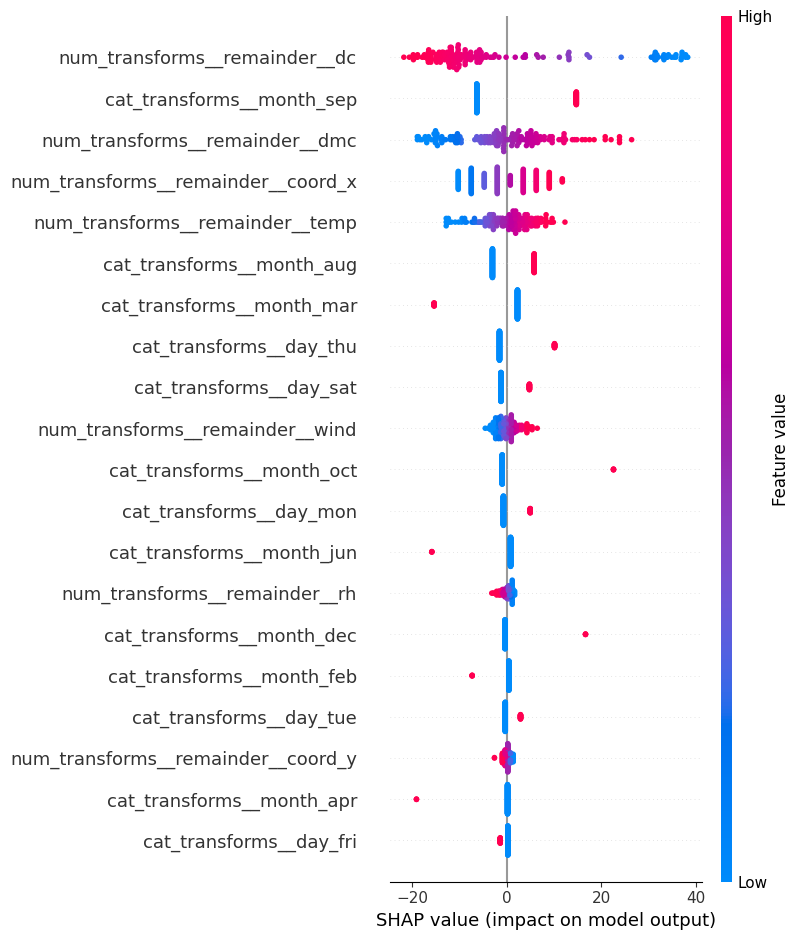

In [26]:
# Import the SHAP library
import shap

# Get the best estimator from the grid search results
pipeline = grid_search_B.best_estimator_

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Transform the test data using the preprocessing steps from the pipeline
data_transform_train = pipeline.named_steps['preprocessing'].transform(X_train)
data_transform_test = pipeline.named_steps['preprocessing'].transform(X_test)

sample_data_transform = shap.sample(data_transform_train, 100)
# Create a SHAP explainer for tree-based models using the trained regressor and transformed test data
explainer = shap.KernelExplainer(
    model=pipeline.named_steps['regressor'].predict,  # Use the predict method of the regressor
    data=sample_data_transform  # Use a small sample of the transformed training data
)

# Calculate SHAP values for the transformed test data
shap_values = explainer.shap_values(data_transform_test)

# Plotting the SHAP waterfall plot for the second instance in the test set
shap.summary_plot(shap_values, data_transform_test, feature_names=pipeline.named_steps['preprocessing'].get_feature_names_out())


100%|██████████| 156/156 [01:55<00:00,  1.35it/s]


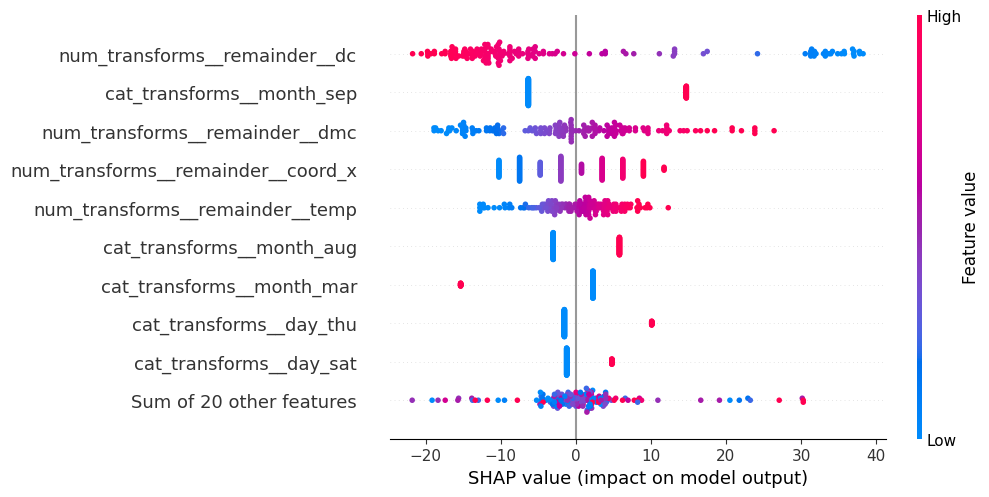

In [28]:

# Plotting the SHAP beeswarm plot for the SHAP values
# Calculate SHAP values for the transformed test data
shap_values = explainer.shap_values(data_transform_test)

# Wrap the SHAP values in an Explanation object
shap_values_exp = shap.Explanation(values=shap_values, base_values=explainer.expected_value, data=data_transform_test, feature_names=pipeline.named_steps['preprocessing'].get_feature_names_out())

# Plotting the SHAP beeswarm plot for the SHAP values
shap.plots.beeswarm(shap_values_exp)


100%|██████████| 156/156 [01:54<00:00,  1.36it/s]


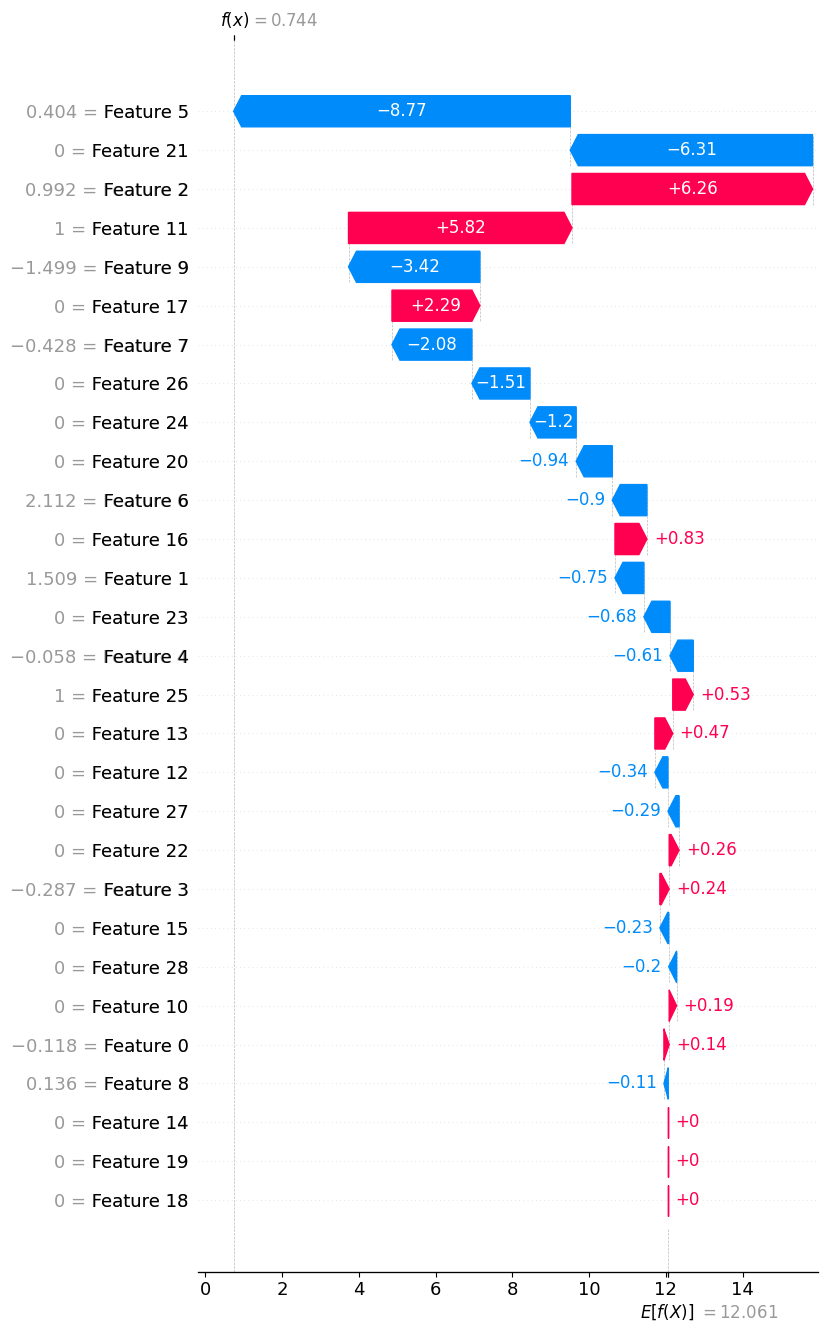

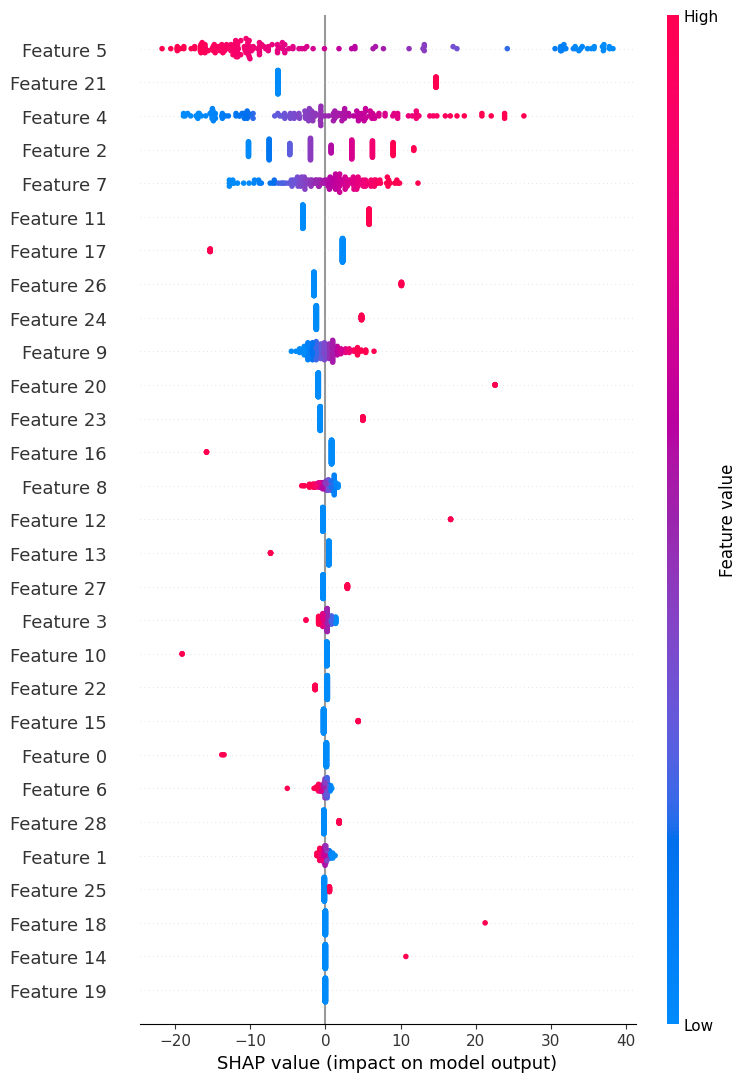

In [31]:
shap_values = explainer(data_transform_test)
shap.plots.waterfall(shap_values[42], max_display = 30)
shap.plots.beeswarm(shap_values, max_display = 30)

*(Answer here.)*

The features that consistently show low importance across the plot. For example, in your plot, features like cat_transforms__day_fri, cat_transforms__month_apr, num_transforms__remainder__coord_y, and others near the bottom with SHAP values centered around zero could be considered for removal.
Features with SHAP values close to zero across most instances indicate a minimal impact on the model's output. These are potential candidates for removal.

- Steps to Test Feature Impact on Model Performance
    - Baseline Model Performance:
        - Train and evaluate the model using all features. This will serve as a baseline to compare against.

    - Identify Features to Remove:
        - Use methods such as SHAP values, feature importance from models, or statistical analysis to identify low-impact features that might be candidates for removal.

    - Reduced Feature Set Model Performance:
        - Train and evaluate the model after removing the identified low-impact features.

    - Performance Comparison:
        - Compare the performance metrics of the baseline model and the reduced feature set model. Key metrics include RMSE, MAE, R², etc.
        - Use cross-validation to ensure consistency of results across different data splits.

    - Statistical Tests (Optional):
        - Perform statistical tests to determine if the difference in performance is statistically significant.

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-3`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_3.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/production/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.

# Reference

Cortez,Paulo and Morais,Anbal. (2008). Forest Fires. UCI Machine Learning Repository. https://doi.org/10.24432/C5D88D.